# Trending YouTube Video Analysis

### by Yueh-Han Chen

### Dataset Overview

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for. Dataset from https://www.kaggle.com/datasnaek/youtube-new.

### Research Questions:
1. Which region got most views?
2. What are the average time for potential videos to get to trending in each region?
3. What are the top 3 channels in each region measured by views and comments?
4. What top 3 categories were the most popular in each regions by views?
5. Throughout 2006 to 2018, which month was published most videos by channels?

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
warnings.simplefilter("ignore")


In [3]:
# build function
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

In [4]:
#load data
clean_df = pd.read_csv('clean_df.csv')
clean_df.drop('Unnamed: 0', axis=1, inplace=True)
clean_df.publish_time=clean_df.publish_time.astype('datetime64[ns]') 
clean_df.trending_date=clean_df.trending_date.astype('datetime64[ns]') 

## Research Question 1: Which region got most views?

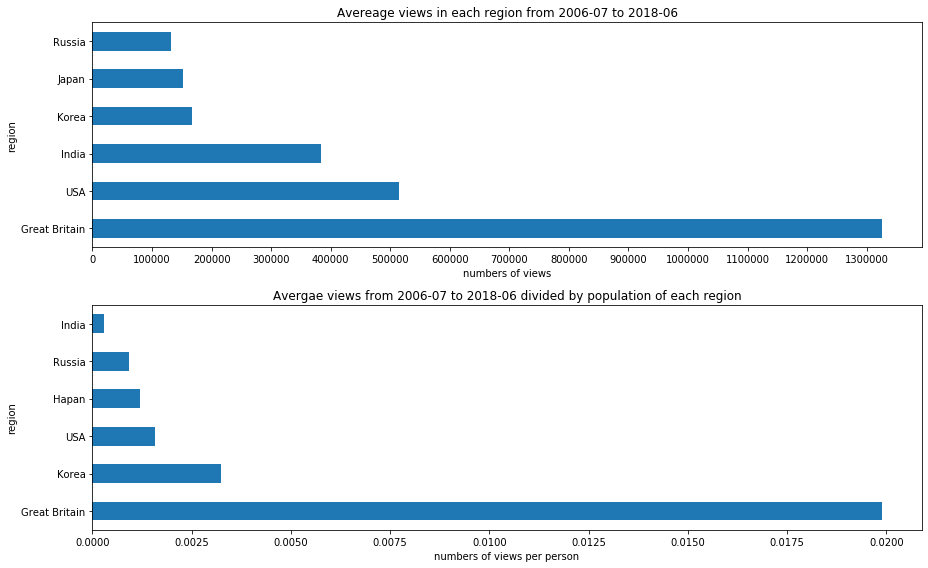

In [5]:
# save each values of views in a list
list1 = list(clean_df.groupby('region').views.mean().sort_values(ascending=False).values)

# Mutiply each population value to orignal value
list2 = [66.65, 328.2, 1353, 51.64, 126.5, 144.5]
list2 = [x * 1000000 for x in list2]

# get the views divided by population nad visulaize it
res = [i / j for i, j in zip(list1, list2)] 
data = {'views/population'     : res,
        'region'  : ['Great Britain', 'USA', 'India', 'Korea', 'Hapan', 'Russia']}
temp = pd.DataFrame(data)
temp = temp.set_index('region')

plt.figure(figsize=(13,8));
# combine these two graph
plt.subplot(2, 1, 1)

# use groupby to see eacch mean views of each region
clean_df.groupby('region').views.mean().sort_values(ascending=False).plot.barh()
desc(title='Avereage views in each region from 2006-07 to 2018-06',xticks1=range(0,1400000,100000),xticks2=range(0,1400000,100000),xlabel='numbers of views')

plt.subplot(2, 1, 2)
temp['views/population'].sort_values(ascending=False).plot.barh();
desc(title='Avergae views from 2006-07 to 2018-06 divided by population of each region', xlabel='numbers of views per person')
plt.tight_layout();

## Research Question 2: What are the average time for potential videos to get to trending in each region?

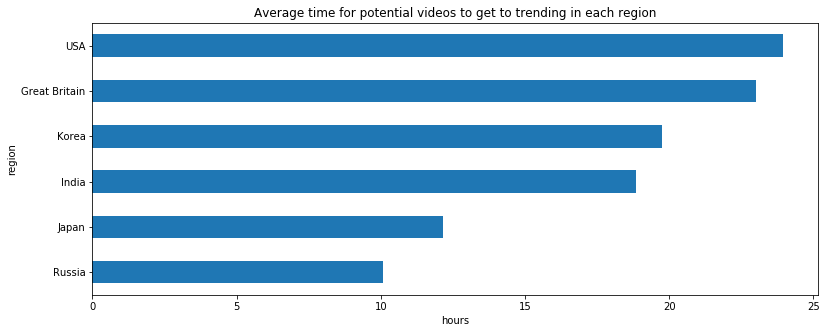

In [6]:
# find the time of every videos used to get trending and save those time to "Time_to_get_trending" column 
clean_df['Time_to_get_trending'] = clean_df['trending_date'] - clean_df['publish_time']
clean_df['Time_to_get_trending'] = clean_df['Time_to_get_trending'].apply(lambda x: x.days*24+x.seconds/3600)

# covert all the negative numbers to zero
clean_df['Time_to_get_trending'] = clean_df['Time_to_get_trending'].apply(lambda x: x if x >= 0 else 0 )

# We only need 95% of the data
temp_df = clean_df.query('Time_to_get_trending<60')

# Visualize it
plt.figure(figsize=(13,5))
temp_df.groupby('region').Time_to_get_trending.mean().sort_values().plot.barh();
desc(title='Average time for potential videos to get to trending in each region',xlabel='hours')

## Research Question 3: What are the top 3 channels in each region measured by views and comments?

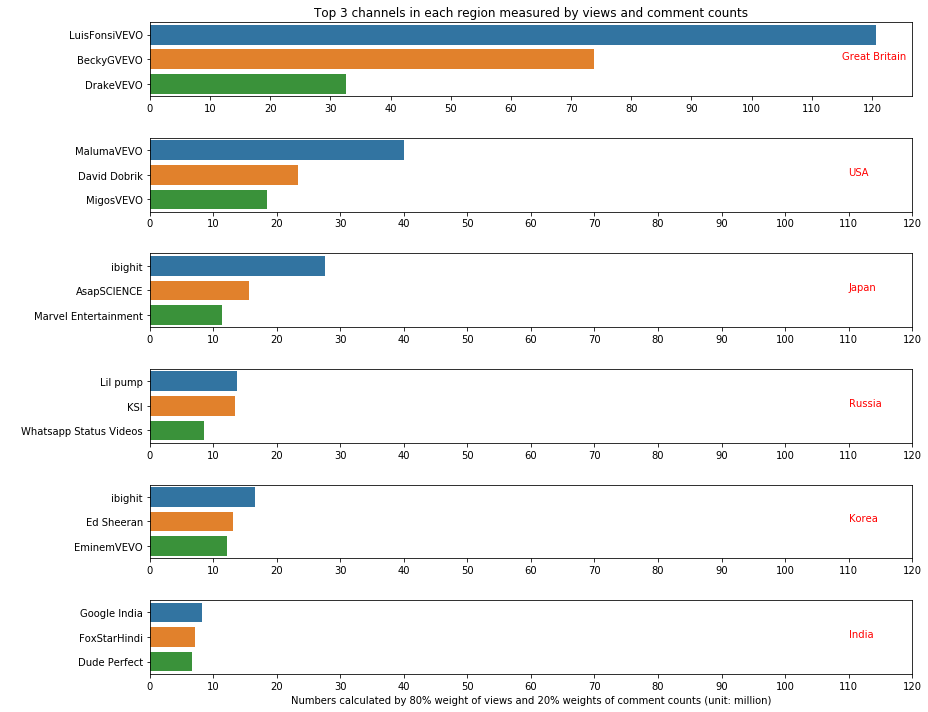

In [7]:
# Views and Comment counts are both good metrics to judge if it is a popular video, 
# but views matter muchh more than comment counts, so I decide to give 80% weights to views and 20% weights to 
# comment counts to calculate the result numbers to find top channels 
clean_df['Popular_number'] = clean_df['views']*0.8 + clean_df['comment_count']*205*0.2

# Create dataframes for each region
Top_3_Channel_USA = pd.DataFrame(clean_df.query('region=="USA"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_USA['region'] = "USA"
Top_3_Channel_USA = Top_3_Channel_USA.reset_index()
Top_3_Channel_GB = pd.DataFrame(clean_df.query('region=="Great Britain"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_GB['region'] = "Great Britain"
Top_3_Channel_GB = Top_3_Channel_GB.reset_index()
Top_3_Channel_Japan = pd.DataFrame(clean_df.query('region=="Japan"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_Japan['region'] = "Japan"
Top_3_Channel_Japan = Top_3_Channel_Japan.reset_index()
Top_3_Channel_Korea = pd.DataFrame(clean_df.query('region=="Korea"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_Korea['region'] = "Korea"
Top_3_Channel_Korea = Top_3_Channel_Korea.reset_index()
Top_3_Channel_India = pd.DataFrame(clean_df.query('region=="India"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_India['region'] = "India"
Top_3_Channel_India = Top_3_Channel_India.reset_index()
Top_3_Channel_Russia = pd.DataFrame(clean_df.query('region=="Russia"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_Russia['region'] = "Russia"
Top_3_Channel_Russia = Top_3_Channel_Russia.reset_index()

# Visualization!
plt.figure(figsize=(13,10))
plt.subplot(6, 1, 1)
sb.barplot(data = Top_3_Channel_GB, y = 'channel_title', x = 'Popular_number')
desc(title='Top 3 channels in each region measured by views and comment counts',ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Great Britain', xy=(115000000, 1), color='red')
plt.subplot(6, 1, 2)
sb.barplot(data = Top_3_Channel_USA, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('USA', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 3)
sb.barplot(data = Top_3_Channel_Japan, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Japan', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 4)
sb.barplot(data = Top_3_Channel_Russia, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Russia', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 5)
sb.barplot(data = Top_3_Channel_Korea, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Korea', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 6)
sb.barplot(data = Top_3_Channel_India, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel="Numbers calculated by 80% weight of views and 20% weights of comment counts (unit: million)", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('India', xy=(110000000, 1), color='red')
plt.tight_layout()

## Research Question 4: What top 3 categories were the most popular in each regions by views?

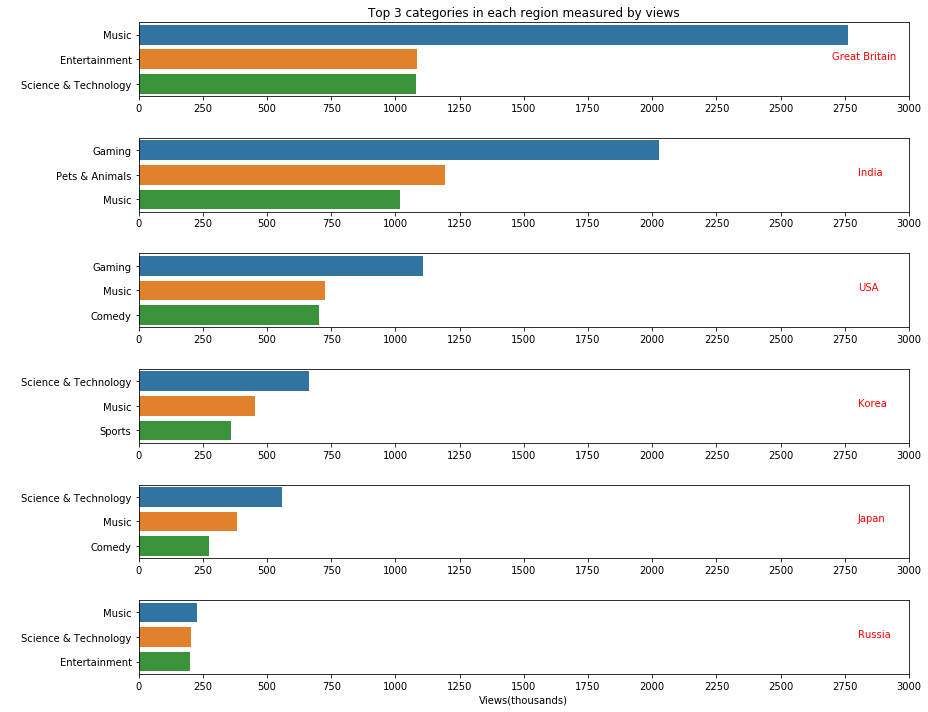

In [8]:
# Create dataframes of top 3 categories for each region
Top_3_category_USA = pd.DataFrame(clean_df.query('region=="USA"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_USA['region'] = "USA"
Top_3_category_USA = Top_3_category_USA.reset_index()
Top_3_category_GB = pd.DataFrame(clean_df.query('region=="Great Britain"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_GB['region'] = "Great Britain"
Top_3_category_GB = Top_3_category_GB.reset_index()
Top_3_category_Japan = pd.DataFrame(clean_df.query('region=="Japan"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_Japan['region'] = "Japan"
Top_3_category_Japan = Top_3_category_Japan.reset_index()
Top_3_category_Korea = pd.DataFrame(clean_df.query('region=="Korea"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_Korea['region'] = "Korea"
Top_3_category_Korea = Top_3_category_Korea.reset_index()
Top_3_category_India = pd.DataFrame(clean_df.query('region=="India"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_India['region'] = "India"
Top_3_category_India = Top_3_category_India.reset_index()
Top_3_category_Russia = pd.DataFrame(clean_df.query('region=="Russia"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_Russia['region'] = "Russia"
Top_3_category_Russia = Top_3_category_Russia.reset_index()

# Visualization!
plt.figure(figsize=(13,10))
plt.subplot(6, 1, 1)
sb.barplot(data = Top_3_category_GB, y = 'category', x = 'views')
desc(title='Top 3 categories in each region measured by views',ylabel=" ", xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Great Britain', xy=(2700000, 1), color='red')
plt.subplot(6, 1, 2)
sb.barplot(data = Top_3_category_India, y = 'category', x = 'views')
desc(ylabel=" ", xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('India', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 3)
sb.barplot(data = Top_3_category_USA, y = 'category', x = 'views')
desc(ylabel=" ", xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('USA', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 4)
sb.barplot(data = Top_3_category_Korea, y = 'category', x = 'views')
desc(ylabel=" ", xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Korea', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 5)
sb.barplot(data = Top_3_category_Japan, y = 'category', x = 'views')
desc(ylabel=" ",xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Japan', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 6)
sb.barplot(data = Top_3_category_Russia, y = 'category', x = 'views')
desc(ylabel=" ", xlabel="Views(thousands)",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Russia', xy=(2800000, 1), color='red')
plt.tight_layout()

## Research Question 5: Throughout 2006 to 2018, which month was published most videos by channels?

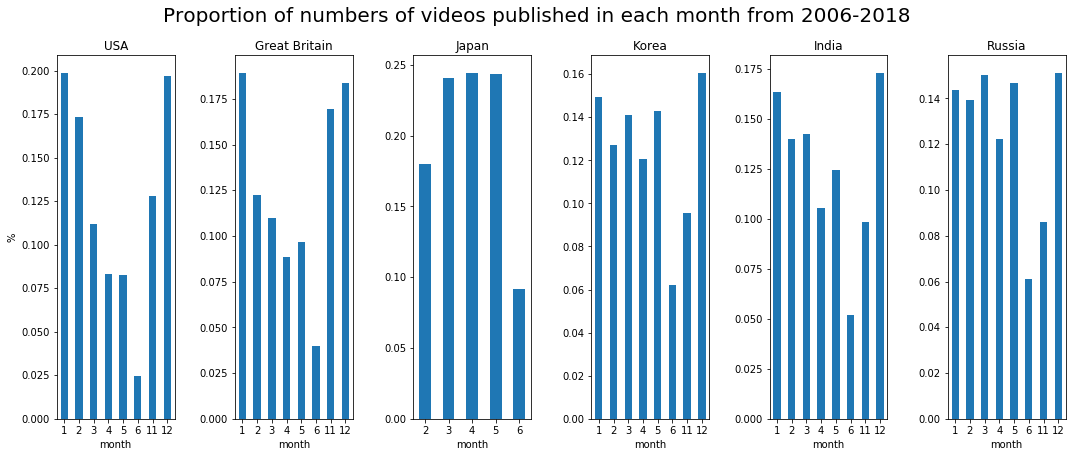

In [51]:
# Visualization!
plt.figure(figsize=(15,6))
#fig = plt.figure()
plt.suptitle('Proportion of numbers of videos published in each month from 2006-2018', fontsize=20,y=1.05)
plt.xticks(rotation=0)
plt.subplot(1, 6, 1)
(clean_df.query('region=="USA"').groupby('month').video_id.count()/clean_df.query('region=="USA"').shape[0]).plot.bar()
desc(title='USA', ylabel='%',xlabel='month')
plt.xticks(rotation=0)
plt.subplot(1, 6, 2)
(clean_df.query('region=="Great Britain"').groupby('month').video_id.count()/clean_df.query('region=="Great Britain"').shape[0]).plot.bar()
desc(title='Great Britain', ylabel=' ', xlabel='month')
plt.xticks(rotation=0)
plt.subplot(1, 6, 3)
(clean_df.query('region=="Japan"').groupby('month').video_id.count()/clean_df.query('region=="Japan"').shape[0]).plot.bar()
desc(title='Japan', ylabel=' ', xlabel='month')
plt.xticks(rotation=0)
plt.subplot(1, 6, 4)
(clean_df.query('region=="Korea"').groupby('month').video_id.count()/clean_df.query('region=="Korea"').shape[0]).plot.bar()
desc(title='Korea', ylabel=' ', xlabel='month')
plt.xticks(rotation=0)
plt.subplot(1, 6, 5)
(clean_df.query('region=="India"').groupby('month').video_id.count()/clean_df.query('region=="India"').shape[0]).plot.bar()
desc(title='India', ylabel=' ', xlabel='month')
plt.xticks(rotation=0)
plt.subplot(1, 6, 6)
(clean_df.query('region=="Russia"').groupby('month').video_id.count()/clean_df.query('region=="Russia"').shape[0]).plot.bar()
desc(title='Russia', ylabel=' ',xlabel='month')
plt.xticks(rotation=0)
plt.tight_layout()
